# <span style='color:#FE774C'>World Ocean Atlas </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analysis
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull data, and run visualizations using functions
### The second part uses a gui based approach

In [1]:
import odp.geospatial as odp
import cmocean
import warnings
warnings.filterwarnings("ignore")

In [2]:
db=odp.Database()
db_plt= odp.PlotTools()
gd=odp.GridData()

### Part 1: Using Functions

#### The following shows the available gridded datasets. To see tabular datasets, run *db.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer search bar](https://app.oceandata.earth/explorer)

#### See available gridded data datasets

In [3]:
gd.datasets

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Atlas 2018 Temperature - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
World Ocean Atlas 2018 Salinity - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Zweng, M. M., J. R. Reagan, D. Seidov, T. P. B...","global climatological trends, objectively anal...","[climatological distributions, salinity, objec...",salinity dimensionless dtype: object
World Ocean Atlas 2018 Oxygen - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, oxygen, objecti...",oxygen micromole per kilogram dtype: object
World Ocean Atlas 2018 Density - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, density, object...",density kilogram per cubic metere dtype: ob...
Vessel Traffic and CO2 Emissions,[HUB],Global gridded CO2 emissions and traffic densi...,Global CO2 emissions and total number of hours...,oceandata.earth,,None,"[emissions, vessels]",None
GEBCO gridded bathymetry data,[GEBCO],GEBCO's aim is to provide the most authoritati...,"GEBCO’s current gridded bathymetric data set, ...",https://www.gebco.net/data_and_products/gridde...,GEBCO Compilation Group (2021) GEBCO 2021 Grid...,global ocean and land terrain models,"[bathymetry, gridded, seabed, terrain]",depth meters dtype: object
World Ocean Atlas 2018 Temperature - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
World Ocean Atlas 2018 Density - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, density, object...",density kilogram per cubic metere dtype: ob...
World Ocean Atlas 2018 Salinity - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Zweng, M. M., J. R. Reagan, D. Seidov, T. P. B...","global climatological trends, objectively anal...","[climatological distributions, salinity, objec...",salinity dimensionless dtype: object


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [4]:
df_gd = gd.datasets
df_gd[['temperature' in x for x in df_gd['tags']]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Atlas 2018 Temperature - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
World Ocean Atlas 2018 Temperature - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
NOAA Coral Reef Watch - Coral Temp,"[NOAA, NESDIS]",NOAA Coral Reef Watch (CRW) has utilized remot...,The NOAA Coral Reef Watch (CRW) daily global 5...,https://coralreefwatch.noaa.gov/index.php,"NOAA Coral Reef Watch. 2018, updated daily. NO...","coral bleaching,SST,satellite product","[coral reef, SST, temperature, satellite, blea...",temperature celsius dtype: object


#### <span style='color:#3464eb'>You can also access citation information, units etc

In [6]:
gd.datasets.loc['World Ocean Atlas 2018 Temperature - 1degree - yearly'].citation

'Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. Locarnini, A.V. Mishonov, A. Grodsky, C.R. Paver, K.W. Weathers, I.V. Smolyar, J.R. Reagan, D. Seidov, M.M. Zweng (2019). Locarnini, R. A., A. V. Mishonov, O. K. Baranova, T. P. Boyer, M. M. Zweng, H. E. Garcia, J. R. Reagan, D. Seidov, K. Weathers, C. R. Paver, and I. Smolyar, 2018. World Ocean Atlas 2018, Volume 1: Temperature. A. Mishonov Technical Ed.; NOAA Atlas NESDIS 81, 52pp'

In [7]:
gd.datasets.loc['World Ocean Atlas 2018 Temperature - 1degree - yearly'].units

temperature    celsius
dtype: object

## Pulling data - <span style='color:#FE774C'> **World Ocean Atlas** </span> -- Temperature
#### Open the World Ocean Atlas dataset of your choice -- Here we open the Temperature file
#### The output is an <span style='color:#9D59F4'>[xarray](https://docs.xarray.dev/en/stable/) </span> -- you can explore the data by clicking on the document icon or the data icon

In [8]:
woa=gd.open_dataset('World Ocean Atlas 2018 Temperature - 1degree - yearly')
woa

<xarray.Dataset>
Dimensions:             (time: 1, nbounds: 2, depth: 102, lat: 180, lon: 360)
Coordinates:
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) datetime64[ns] 1981-01-01
Dimensions without coordinates: nbounds
Data variables:
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    crs                 int32 ...
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(102, 2), meta=np.ndarray>
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
    t_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_dd                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 26, 45, 180), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    cdm_data_type:                   Grid
    comment:                         global climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    creator_email:                   NCEI.info@noaa.gov
    ...                              ...
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P30Y
    time_coverage_end:               2010-12-31
    time_coverage_resolution:        P01Y
    time_coverage_start:             1981-01-01
    title:                           World Ocean Atlas 2018 : sea_water_tempe...

### You can now use <span style='color:#9D59F4'> [xarray](https://docs.xarray.dev/en/stable/) </span> methods on the data
#### Here we use 'sel' to select a specific depth and area

Here we slice on depth, and you can also slice on longitude and latitude ('lon' and 'lat')

In [9]:
ds_slice=woa.sel(depth=10,lon=slice(-90,90), lat=slice(-180, 180), )
ds_slice

<xarray.Dataset>
Dimensions:             (time: 1, nbounds: 2, lat: 180, lon: 180)
Coordinates:
    depth               float32 10.0
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time                (time) datetime64[ns] 1981-01-01
Dimensions without coordinates: nbounds
Data variables:
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    crs                 int32 ...
    depth_bnds          (nbounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
    t_an                (time, lat, lon) float32 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_dd                (time, lat, lon) float64 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_gp                (time, lat, lon) float64 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_mn                (time, lat, lon) float32 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_oa                (time, lat, lon) float32 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_sd                (time, lat, lon) float32 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
    t_se                (time, lat, lon) float32 dask.array<chunksize=(1, 45, 90), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    cdm_data_type:                   Grid
    comment:                         global climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    creator_email:                   NCEI.info@noaa.gov
    ...                              ...
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P30Y
    time_coverage_end:               2010-12-31
    time_coverage_resolution:        P01Y
    time_coverage_start:             1981-01-01
    title:                           World Ocean Atlas 2018 : sea_water_tempe...

In [10]:
ds_slice.t_an

<xarray.DataArray 't_an' (time: 1, lat: 180, lon: 180)>
dask.array<getitem, shape=(1, 180, 180), dtype=float32, chunksize=(1, 45, 90), chunktype=numpy.ndarray>
Coordinates:
    depth    float32 10.0
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1981-01-01
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

### <span style='color:#9D59F4'> **Plot the data** </span> using built-in functions
#### Here we plot the annual temperature (t_an)

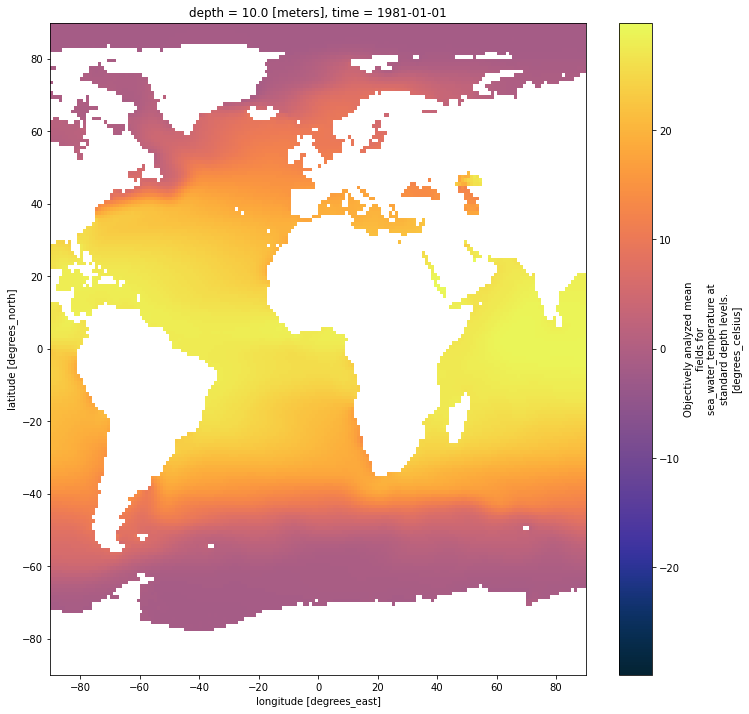

In [11]:
ds_slice.t_an.plot(figsize=(12,12), cmap=cmocean.cm.thermal)

#### We can also do the annual statistical mean of Temperature (t_mn)

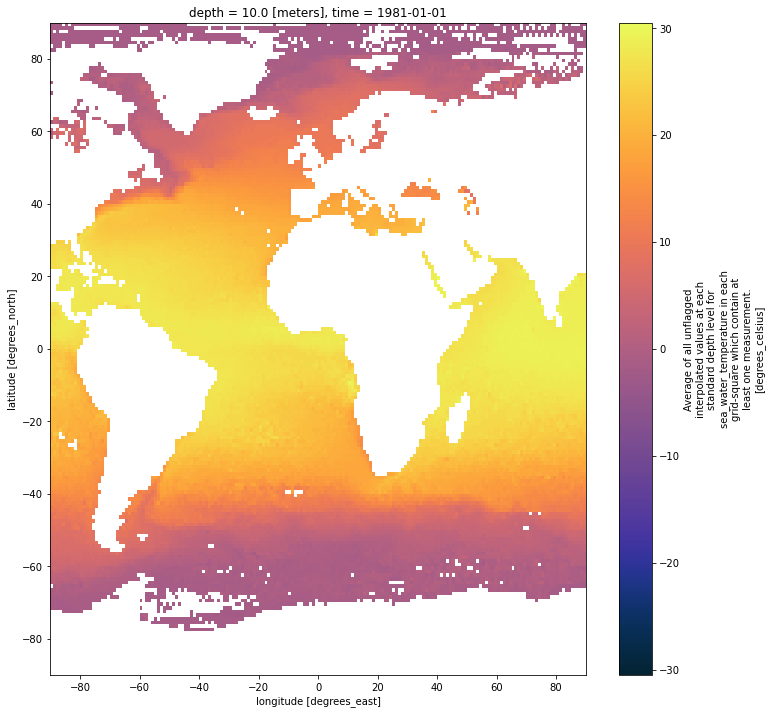

In [12]:
ds_slice.t_mn.plot(figsize=(12,12),cmap=cmocean.cm.thermal)

#### We can also call the <span style='color:#9D59F4'> xarray </span> 'min' or 'max' method to compute the minimum temperature in our slice

In [13]:
ds_slice.t_an.min().compute()

<xarray.DataArray 't_an' ()>
array(-1.8543, dtype=float32)
Coordinates:
    depth    float32 10.0

In [14]:
ds_slice.t_an.max().compute()

<xarray.DataArray 't_an' ()>
array(29.842909, dtype=float32)
Coordinates:
    depth    float32 10.0

### <span style='color:#9D59F4'> **Plot** </span> the temperature profile at a specific location


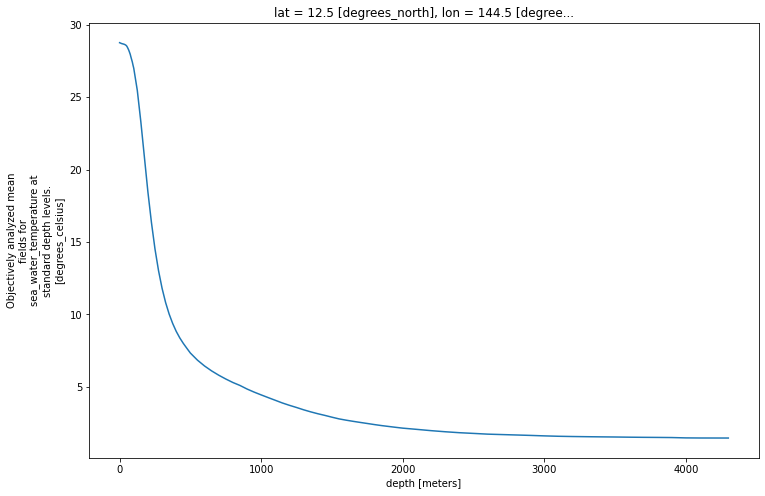

In [15]:
woa.t_an.sel(lon=144.60973445, lat=12.05192707,method='nearest').plot(figsize=(12,8))

### Part 2: Access through selector

Start selector GUI and select the Dataset you wish to pull from (here, WOA). You can select to query only one depth
Then select the region of interest with the polygon drawing tool in the map. <br>Note that boundary box of the polygon is used for the selection.The yellow box only represents where data is available

In [16]:
gd.selector()

GridspecLayout(children=(interactive(children=(Dropdown(description='Dataset', options=('World Ocean Atlas 201…

Get the data within the polygon by calling the data_selection method in the odp sdk

In [ ]:
woa=gd.data_selection()
woa

You can run all the functions you ran above on the xarray dataframe as well

In [ ]:
ds_slice=woa.sel(depth=10,lon=slice(-90,90), lat=slice(-180, 180), )
ds_slice

In [ ]:
ds_slice.t_an.min().compute()